# MLEx16. Autoencoder latent space

Analysis of the latent space for a 8-values autoencoder

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Input
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adam, Nadam

# Data set

Dataset: 8 values in 1-out-of-8 encoding

In [ ]:
X = []
for i in range(8):
    x = [0,0,0,0,0,0,0,0]
    x[i] = 1
    X.append(x)
X = np.array(X)

print("Input: %s" %str(X.shape))
print(X)

iepoch = 0

Input: (8, 8)
[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]


# Model

Define an autoencoder with 
  
  - 8 input nodes

  - 3 hidden nodes
  
  - 8 output nodes




In [ ]:
ninput = 8
noutput = 8
nhidden = 3
lrate = 1e-3

model = Sequential()
model.add(Dense(nhidden, input_dim=ninput, activation='sigmoid', name='code'))
model.add(Dense(noutput, activation='sigmoid'))
opt = Adam(lr=lrate)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
print("Created new model i:%d h:%d o:%d" %(ninput,nhidden,noutput))
model.summary()

Created new model i:8 h:3 o:8
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 code (Dense)                (None, 3)                 27        
                                                                 
 dense (Dense)               (None, 8)                 32        
                                                                 
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# Train the autoencoder

Note: the dataset X is given as both input and output!

In [ ]:
batch_size = 16
nepoch = 1000
iters = 10

for i in range(iters):
  h = model.fit(X, X, batch_size=batch_size, epochs=nepoch, verbose=0)
  current_loss = h.history['loss'][len(h.history['loss'])-1]
  current_acc = h.history['accuracy'][len(h.history['accuracy'])-1]
  iepoch += nepoch
  print("Epoch %d - Accuracy %.2f Loss %f"  %(iepoch,current_acc,current_loss))
        

Epoch 1000 - Accuracy 0.25 Loss 0.110806
Epoch 2000 - Accuracy 0.38 Loss 0.099977
Epoch 3000 - Accuracy 0.62 Loss 0.081439
Epoch 4000 - Accuracy 0.75 Loss 0.066283
Epoch 5000 - Accuracy 0.75 Loss 0.052772
Epoch 6000 - Accuracy 0.88 Loss 0.042486
Epoch 7000 - Accuracy 0.88 Loss 0.034939
Epoch 8000 - Accuracy 1.00 Loss 0.022246
Epoch 9000 - Accuracy 1.00 Loss 0.013154
Epoch 10000 - Accuracy 1.00 Loss 0.008689


# Analysis of the encoder

Display the latent space

1/1 [==============================] - 0s 82ms/step
[[ 0.992  0.002  0.989]
 [ 0.996  0.820  0.006]
 [ 0.011  0.370  0.003]
 [ 0.009  0.531  0.999]
 [ 0.805  0.003  0.004]
 [ 0.006  0.003  0.475]
 [ 0.989  0.981  0.983]
 [ 0.011  0.997  0.363]]


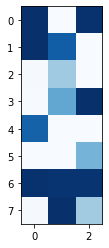

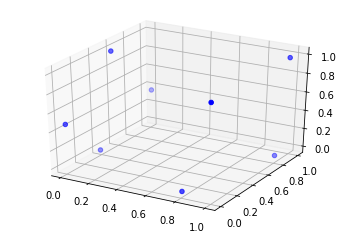

In [ ]:
il = model.get_layer(index=0).input
ol = model.get_layer(name='code').output

menc = Model(inputs=il, outputs=ol)

np.set_printoptions(precision=3, formatter={'float':lambda x: '%6.3f' %x}, suppress=True)

code = menc.predict(X)
print(code)

plt.imshow(code, cmap=plt.cm.Blues)

fig = plt.figure()
ax = plt.axes(projection='3d')


# Data for three-dimensional scattered points

xdata = code[:,0]
ydata = code[:,1]
zdata = code[:,2]
ax.scatter3D(xdata, ydata, zdata, c='blue');

# Analysis of the decoder

Show decoded values

1/1 [==============================] - 0s 44ms/step
[[ 0.011  0.005  0.843  0.012  0.414  0.728  0.005  0.026]
 [ 0.334  0.000  0.002  0.766  0.002  0.892  0.040  0.008]
 [ 0.000  0.364  0.762  0.020  0.001  0.001  0.065  0.866]
 [ 0.003  0.001  0.001  0.844  0.000  0.004  0.377  0.654]
 [ 0.160  0.175  0.023  0.000  0.937  0.008  0.023  0.000]
 [ 0.897  0.000  0.000  0.028  0.046  0.023  0.174  0.000]
 [ 0.001  0.957  0.014  0.000  0.025  0.000  0.259  0.078]
 [ 0.056  0.040  0.000  0.045  0.000  0.000  0.754  0.024]]


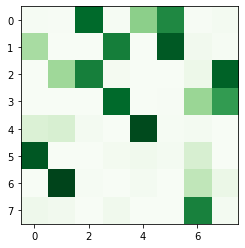

In [ ]:
il = Input(shape=(3,))
ol = model.layers[-1](il)

mdec = Model(inputs=il, outputs=ol)

C = np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]])


Xdec = mdec.predict(C)
print(Xdec)
plt.imshow(Xdec, cmap=plt.cm.Greens)


# Anomaly detection

Let's consider anomalies (i.e., inputs that are not 1-out-of-8 encodings)

1/1 [==============================] - 0s 57ms/step
[[ 0.890  0.000  0.000  0.027  0.047  0.023  0.169  0.000]
 [ 0.098  0.093  0.062  0.000  0.887  0.023  0.018  0.001]
 [ 0.000  0.057  0.139  0.129  0.000  0.002  0.133  0.795]
 [ 0.138  0.198  0.023  0.000  0.922  0.006  0.026  0.000]
 [ 0.065  0.001  0.000  0.318  0.000  0.004  0.325  0.036]
 [ 0.163  0.000  0.005  0.606  0.003  0.783  0.037  0.014]
 [ 0.075  0.013  0.005  0.009  0.057  0.013  0.067  0.005]]
[0.005539189555322019, 0.004473566316086615, 0.012334449418408038, 0.08368709504851901, 0.251181342313445, 0.15379869727355328, 0.0017305537467930607]


<BarContainer object of 7 artists>

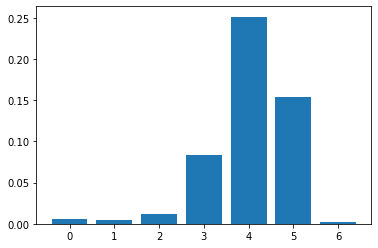

In [ ]:
import sklearn.metrics

test = np.array([
    [1,0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0],
    [0,0,0,0,0,0,0,1],
    [0,1,0,0,1,0,0,0],
    [1,0,0,0,0,0,0,1],
    [0,1,0,1,0,1,0,0],
    [0,0,0,0,0,0,0,0],
    ])

ytest = model.predict(test)
print(ytest)
results = [sklearn.metrics.mean_squared_error(test[i],ytest[i]) for i in range(0,len(test))]
print(results)

fig = plt.figure()
plt.bar(range(0,len(test)),results)
